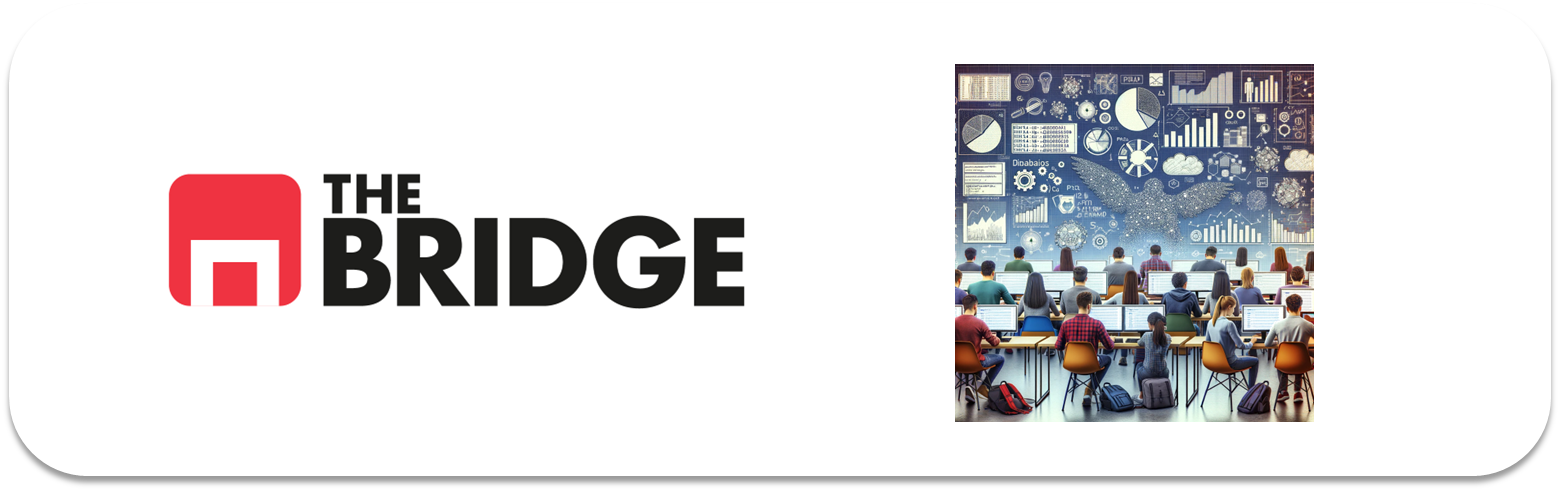

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [2]:
df_boston = pd.read_csv('./data/hard_to_find/obligatoria_hard.csv', sep= '|')

df_boston.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
180,0.06588,0.0,2.46,0.0,0.488,7.765,83.3,2.7410,3.0,193.0,17.8,7.56,39.8
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5.0,311.0,15.2,15.71,21.7
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,6.58,23.1
356,8.98296,0.0,18.10,1.0,0.770,6.212,97.4,2.1222,24.0,666.0,20.2,17.60,17.8
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,15.10,17.5
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,19.77,8.3
487,4.83567,0.0,18.10,0.0,0.583,5.905,53.2,3.1523,24.0,666.0,20.2,11.45,20.6
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
394,13.35980,0.0,18.10,0.0,0.693,5.887,94.7,1.7821,24.0,666.0,20.2,16.35,12.7
237,0.51183,0.0,6.20,0.0,0.507,7.358,71.6,4.1480,8.0,307.0,17.4,4.73,31.5


In [3]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


#### Vamos a analizar la variable 'MEDV' (Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares).

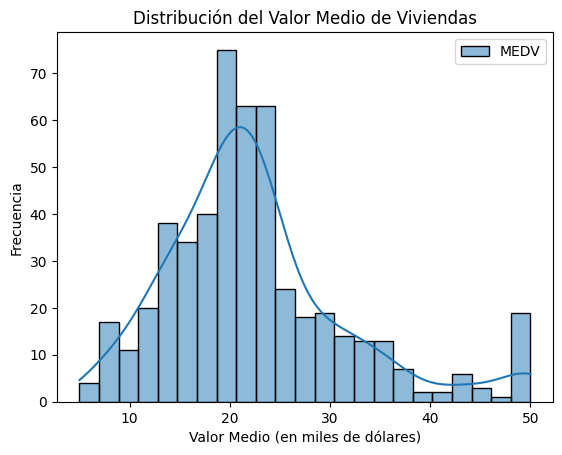

In [6]:
df_target = df_boston[['MEDV']].copy() 
plt.title('Distribución del Valor Medio de Viviendas')
plt.xlabel('Valor Medio (en miles de dólares)')
plt.ylabel('Frecuencia')
sns.histplot(df_target, kde= True);

In [9]:
train_set, test_set = train_test_split(df_boston, test_size=0.2, random_state=42)    #Usamos de test un 20% de los datos. Random_state para la semilla.

In [10]:
X_train = train_set.drop("MEDV", axis=1)
y_train = train_set["MEDV"]
X_test = test_set.drop("MEDV", axis=1)
y_test = test_set["MEDV"]

#### Comprobamos que variables queremos mantener

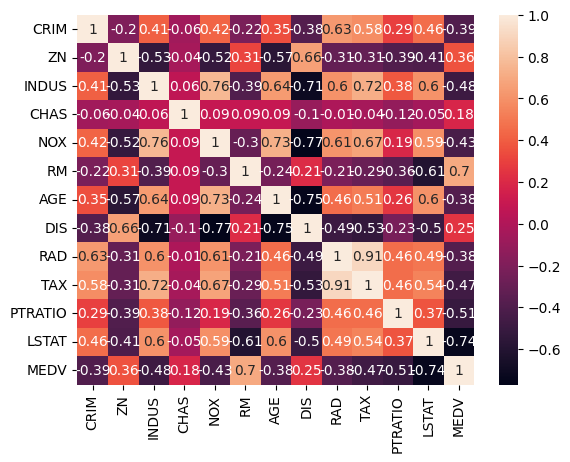

In [11]:
correlation_matrix = df_boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

#### Observaciones:

'RM' tiene una fuerte correlacion con MEDV (positiva) y 'LSTAT' también (negativa). Podemos asumir qu e'PTRATIO' y 'TAX' tambien tienen una gran correlación con 'MEDV'. 

Por otra parte, TAX y RAD estan altamente correladas, puede dar problemas a la hora de hacer la regresión.

In [12]:
#Estandarizamos:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
#Hacemos el modelo de regresion lineal
lin_model = LinearRegression()
lin_model.fit(X_train_scaled, y_train)

LinearRegression()

In [16]:
print("Intercepto:", lin_model.intercept_)

# Imprimir los coeficientes:
print("Coeficientes:")
for feature, coef in zip(X_train.columns, lin_model.coef_):
    print(f"{feature}: {coef}")

Intercepto: 22.796534653465343
Coeficientes:
CRIM: -1.127473281154346
ZN: 0.7121090028750632
INDUS: 0.17385770977903803
CHAS: 0.7871520021834428
NOX: -2.13759896343785
RM: 3.0044195835139065
AGE: -0.10050028659458166
DIS: -3.1194594208872646
RAD: 2.058897696398899
TAX: -1.871316868611224
PTRATIO: -1.9918714982093955
LSTAT: -3.8190157446466806


In [23]:
pred_train = lin_model.predict(X_train_scaled)
y_pred = lin_model.predict(X_test_scaled)
print('MAE train', mean_absolute_error(y_train, pred_train))
print('MSE train', mean_squared_error(y_train, pred_train))
print('RMSE train', np.sqrt(mean_squared_error(y_train, pred_train)))
print('R2 train', lin_model.score(X_train_scaled,y_train))
print()
print()
print('MAE test', mean_absolute_error(y_test, y_pred))
print('MSE test', mean_squared_error(y_test, y_pred))
print('RMSE test', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 test', lin_model.score(X_test_scaled,y_test))

MAE train 3.424468775949534
MSE train 22.60428647941742
RMSE train 4.754396542087904
R2 train 0.739801993681731


MAE test 3.111377388238187
MSE test 22.777708563866035
RMSE test 4.772599769922682
R2 test 0.689396788461476


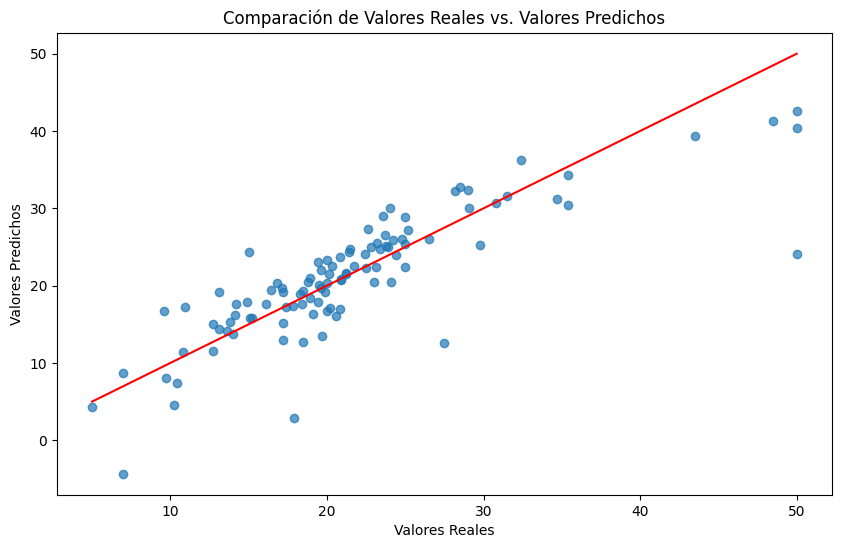

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)  
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Comparación de Valores Reales vs. Valores Predichos')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # recta y=x

plt.show()

Vamos a repetir el modelo pero esta vez excluyendo 'CHAS'

In [30]:
data=df_boston.drop('CHAS', axis=1)
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
X_train = train_set.drop('MEDV', axis=1)
y_train = train_set['MEDV']
X_test = test_set.drop('MEDV', axis=1)
y_test = test_set['MEDV']

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
lin_model_no_chas = LinearRegression()
lin_model_no_chas.fit(X_train_scaled, y_train)

LinearRegression()

In [35]:
print("Intercepto:", lin_model.intercept_)

# Imprimir los coeficientes:
print("Coeficientes:")
for feature, coef in zip(X_train.columns, lin_model.coef_):
    print(f"{feature}: {coef}")

Intercepto: 22.796534653465343
Coeficientes:
CRIM: -1.127473281154346
ZN: 0.7121090028750632
INDUS: 0.17385770977903803
NOX: 0.7871520021834428
RM: -2.13759896343785
AGE: 3.0044195835139065
DIS: -0.10050028659458166
RAD: -3.1194594208872646
TAX: 2.058897696398899
PTRATIO: -1.871316868611224
LSTAT: -1.9918714982093955


In [36]:
pred_train = lin_model_no_chas.predict(X_train_scaled)
y_pred = lin_model_no_chas.predict(X_test_scaled)
print('MAE train', mean_absolute_error(y_train, pred_train))
print('MSE train', mean_squared_error(y_train, pred_train))
print('RMSE train', np.sqrt(mean_squared_error(y_train, pred_train)))
print('R2 train', lin_model_no_chas.score(X_train_scaled,y_train))
print()
print()
print('MAE test', mean_absolute_error(y_test, y_pred))
print('MSE test', mean_squared_error(y_test, y_pred))
print('RMSE test', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 test', lin_model_no_chas.score(X_test_scaled,y_test))

MAE train 3.4512480618589008
MSE train 23.171790597579204
RMSE train 4.813708611619445
R2 train 0.7332694521543726


MAE test 3.156707411446017
MSE test 22.95218120263626
RMSE test 4.790843475071615
R2 test 0.6870176307083735


#### Hemos obtenido unos resultados similares.

### Regularizamos el modelo: (Ridge)

In [37]:
alphas = [0.01, 0.1, 1]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    print(f"Ridge con alpha {alpha}: ", ridge.score(X_test_scaled, y_test))

Ridge con alpha 0.01:  0.6870130546235247
Ridge con alpha 0.1:  0.686971855100559
Ridge con alpha 1:  0.6865589774871985


Por probrar más valores de alpha:

In [40]:
from sklearn.linear_model import RidgeCV

alphas = [0.1, 1.0, 10.0, 100.0]

# Crear el modelo RidgeCV
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)

# Ajustar el modelo a los datos
ridge_cv.fit(X_train, y_train)

# Acceder al mejor alpha encontrado
best_alpha = ridge_cv.alpha_

# Evaluar el modelo
print("Mejor alpha:", best_alpha)
print("R^2 del modelo con el mejor alpha:", ridge_cv.score(X_test, y_test))

Mejor alpha: 0.1
R^2 del modelo con el mejor alpha: 0.686448424924664


### Regularizamos el modelo: (Lasso)

In [42]:
from sklearn.linear_model import LassoCV

# Definir un rango de valores de alpha para explorar
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Crear el modelo LassoCV
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42) #cv es cross validation

# Ajustar el modelo a los datos de entrenamiento
lasso_cv.fit(X_train_scaled, y_train)

# Mejor alpha encontrado
print("Mejor alpha:", lasso_cv.alpha_)

# Evaluar el modelo en el conjunto de prueba
y_pred_cv = lasso_cv.predict(X_test_scaled)
mse_cv = mean_squared_error(y_test, y_pred_cv)
r2_cv = r2_score(y_test, y_pred_cv)

print("MSE con CV:", mse_cv)
print("R^2 con CV:", r2_cv)

Mejor alpha: 0.001
MSE con CV: 22.958557340106736
R^2 con CV: 0.6869306839125626
